In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Преобразуем строку в список чисел
import numpy as np

data = """
567 620 593 570 588 599 565 556 577 569
607 597 589 556 583 593 581 524 582 577
526 579 526 546 581 582 530 507 575 596
546 585 584 564 561 543 543 539 584 573
539 575 539 566 551 591 585 532 555 568
580 553 540 600 588 550 556 563 526 578
513 570 547 595 535 519 594 566 543 574
571 545 549 589 571 566 548 593 558 594
534 586 559 542 515 584 533 596 526 575
600 582 557 535 558 598 531 565 586 564
"""
data = np.array(list(map(int, data.strip().split())))
data

array([567, 620, 593, 570, 588, 599, 565, 556, 577, 569, 607, 597, 589,
       556, 583, 593, 581, 524, 582, 577, 526, 579, 526, 546, 581, 582,
       530, 507, 575, 596, 546, 585, 584, 564, 561, 543, 543, 539, 584,
       573, 539, 575, 539, 566, 551, 591, 585, 532, 555, 568, 580, 553,
       540, 600, 588, 550, 556, 563, 526, 578, 513, 570, 547, 595, 535,
       519, 594, 566, 543, 574, 571, 545, 549, 589, 571, 566, 548, 593,
       558, 594, 534, 586, 559, 542, 515, 584, 533, 596, 526, 575, 600,
       582, 557, 535, 558, 598, 531, 565, 586, 564])

## Расчет статистических параметров

In [ ]:
def calculate_parameters(data):
  """
  Функция для вычисления параметров выборки.

  Args:
      data: NumPy массив или Pandas Series с данными.

  Returns:
      Словарь с параметрами.
  """

  # Объем выборки
  sample_size = len(data)

  # Наибольшее значение
  maximum = np.max(data)

  # Наименьшее значение
  minimum = np.min(data)

  # Размах
  range = maximum - minimum

  # Количество интервалов
  number_of_intervals = np.trunc(1.44 * np.log(sample_size) + 1)

  # Длина интервала
  interval_length = range / number_of_intervals

  # Медиана
  median = np.median(data)

  # Выборочное среднее
  mean = np.mean(data)

  # Стандартное отклонение
  standard_deviation = np.std(data)

  # Вывод параметров
  parameters = {
      "Объем выборки": sample_size,
      "Наибольшее значение": maximum,
      "Наименьшее значение": minimum,
      "Размах": range,
      "Количество интервалов": number_of_intervals,
      "Длина интервала": interval_length,
      "Медиана": median,
      "Выборочное среднее": mean,
      "Стандартное отклонение": standard_deviation
  }

  return parameters

In [ ]:
parameters = calculate_parameters(data)

In [ ]:
parameters

{'Объем выборки': 100,
 'Наибольшее значение': 620,
 'Наименьшее значение': 507,
 'Размах': 113,
 'Количество интервалов': 7.0,
 'Длина интервала': 16.142857142857142,
 'Медиана': 566.5,
 'Выборочное среднее': 564.64,
 'Стандартное отклонение': 24.421105626076802}

## Проведем расчет оценки плотности распределения

In [ ]:
k = int(parameters['Количество интервалов'])
h = parameters['Длина интервала']

In [ ]:
# Ширина интервала
h = (np.max(data) - np.min(data)) / k

# Левые границы интервалов
left_borders = np.arange(np.min(data), np.max(data) + h, h)[:-1:]

# Правые границы интервалов
right_borders = left_borders + h

# Середины интервалов
midpoints = (left_borders + right_borders) / 2

# Частоты
frequencies = np.histogram(data, bins=k)[0]

# Относительные частоты
relative_frequencies = frequencies / len(data)

# Высота гистограммы
heights = relative_frequencies / h

In [ ]:
normal_distribution_density

array([0.00208223, 0.00640237, 0.01271711, 0.01631817, 0.01352666,
       0.00724344, 0.00250574])

In [ ]:
mean = parameters['Выборочное среднее']
std = parameters['Стандартное отклонение']

In [ ]:
x_values = np.linspace(np.max(data), np.min(data), 100)
y_values = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(x_values - mean)**2 / (2 * std**2))

In [ ]:
normal_distribution_density = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(midpoints - mean)**2 / (2 * std**2))

<BarContainer object of 7 artists>

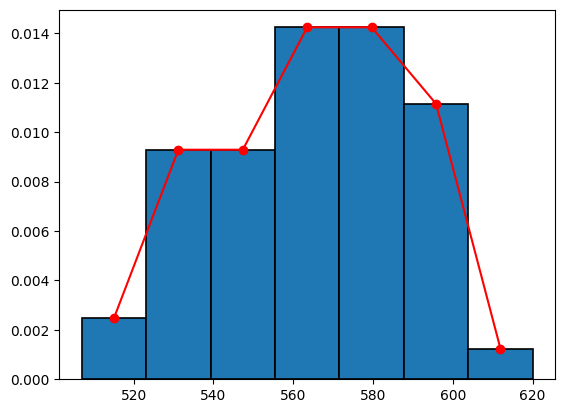

In [ ]:
plt.plot(midpoints, heights, marker='o', color='red', linestyle='-')
plt.bar(midpoints, heights, edgecolor='black', linewidth=1.2, width=h)

<BarContainer object of 7 artists>

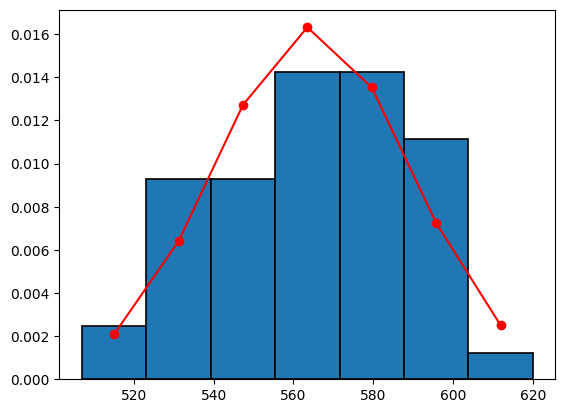

In [ ]:
plt.plot(midpoints, normal_distribution_density, marker='o', color='red', linestyle='-')
plt.bar(midpoints, heights, edgecolor='black', linewidth=1.2, width=h)

<BarContainer object of 7 artists>

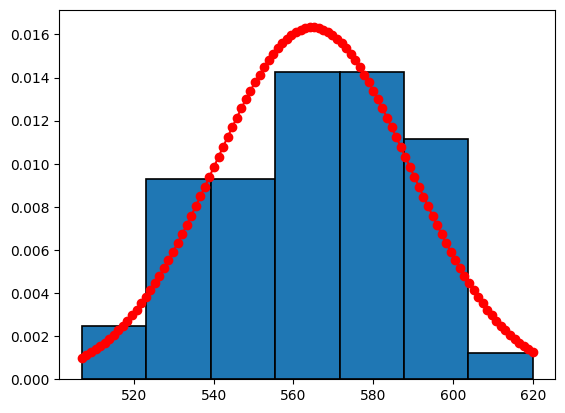

In [ ]:
plt.plot(x_values, y_values, marker='o', color='red', linestyle='-')
plt.bar(midpoints, heights, edgecolor='black', linewidth=1.2, width=h)